# PCA is a unsupervised learning algorithm used for dimensionality reduction
# PCA does not predict outcomes rather finds relation between variables
# Uses eigenvalues and eigenvectors
# PCA is used when data is linearly seperable

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
#Import dataset
dataset = pd.read_csv('Wine.csv')

In [4]:
dataset.head(6)
#depending upon various factors predict whether the custoer is in category 1 , 2 , 3 

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1


In [5]:
#Prepare set of dependent and independent variables
X = dataset[dataset.columns[:-1]].values
y = dataset['Customer_Segment'].values

In [6]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [7]:
#Standardize the data 
#Dimensionality reducion requires standardization

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [8]:
#Split the data for testing and training 

from sklearn.model_selection import train_test_split
Xtrain , Xtest ,ytrain , ytest = train_test_split(X,y,test_size = 0.2 , random_state = 0)

In [9]:
#Applying PCA

from sklearn.decomposition import PCA

In [12]:
#Applying PCA to find the best columns having the maximum variance
#execute only once
pc = PCA(n_components = None)     #None means all columns
Xtrain = pc.fit_transform(Xtrain)
Xtest = pc.transform(Xtest)
explained_variance = pc.explained_variance_ratio_

In [13]:
#these are not the actual columns but the transformed columns
#we take first two columns as for visualization ease
explained_variance

array([0.36722576, 0.19231879, 0.10830194, 0.07414597, 0.06288414,
       0.05059778, 0.0419487 , 0.02518069, 0.02222384, 0.01858596,
       0.01712304, 0.01277985, 0.00668354])

In [10]:
#before running this cell pls restart the kernel 

pc = PCA(n_components = 2)
Xtrain = pc.fit_transform(Xtrain)
Xtest = pc.transform(Xtest)


In [11]:
#Training A logistic model
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(Xtrain , ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
ypred = classifier.predict(Xtest)

In [13]:
# analyze the result using a confusion matrix

from sklearn.metrics import confusion_matrix
# note that confusion_matrix is not a class but a function

# Class always starts with a Uppercase letter
# whereas function start in lowercase letter

cm = confusion_matrix(ytest , ypred)

In [14]:
cm

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


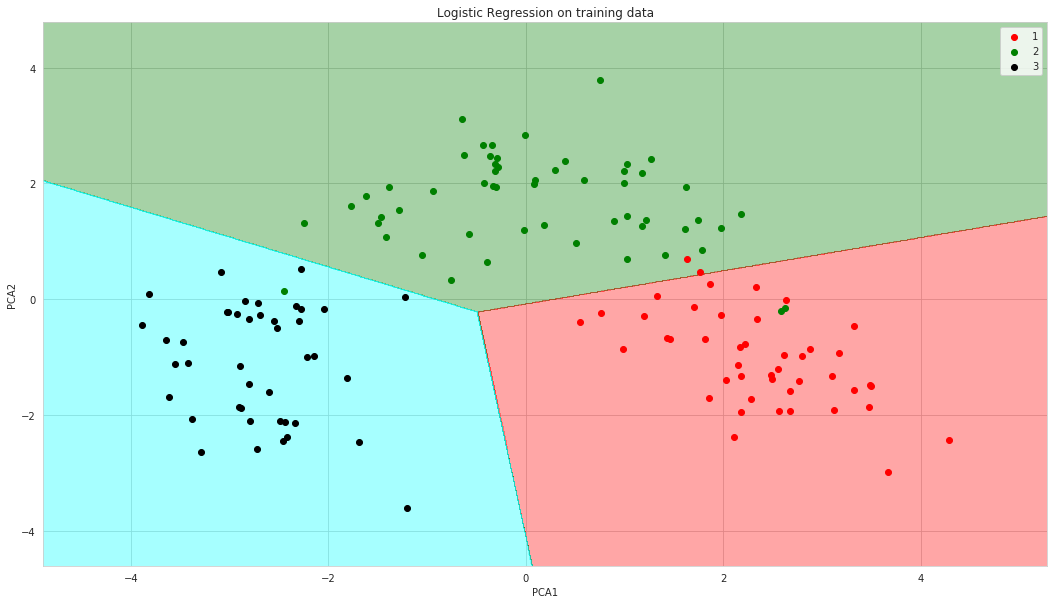

In [19]:
# Visualizing Logistic Regression On Training Data

sns.set_style('whitegrid')
plt.figure(figsize = (18,10))
from matplotlib.colors import ListedColormap

X_set , y_set = Xtrain , ytrain

#-------------------

X1 , X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1 , stop = X_set[:,0].max() + 1 , step = 0.01) ,
                      np.arange(start = X_set[:,1].min() - 1 , stop = X_set[:,1].max() + 1 , step = 0.01))

# meshgrid converts a 1D array into a matrix conining the rectangular coordinates for that points in the array
# and here we are taking arange two times because we have two parameters deciding the value

#-------------------
plt.contourf(X1 ,X2 , classifier.predict(np.array([X1.ravel() , X2.ravel()]).T).reshape(X1.shape) , alpha = 0.35,
            cmap = ListedColormap(('red' , 'green' , 'cyan')))

# contour fill plot is used to plot contours and fill the regions having same value with some color
# ravel converts a n dim matrix into an 1D array

#------------------
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

#--------------------

for i , j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j , 0] , X_set[y_set == j , 1] , c = ListedColormap(('red','green' , 'black'))(i) , label = j)

# enumerate returns the a set of labels and for each unique value in the array returned by unique()
# here in this case j will be 0 ,1 i.e the unique values and i will be 0,1 i.e the label assigned to this values

plt.title('Logistic Regression on training data')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


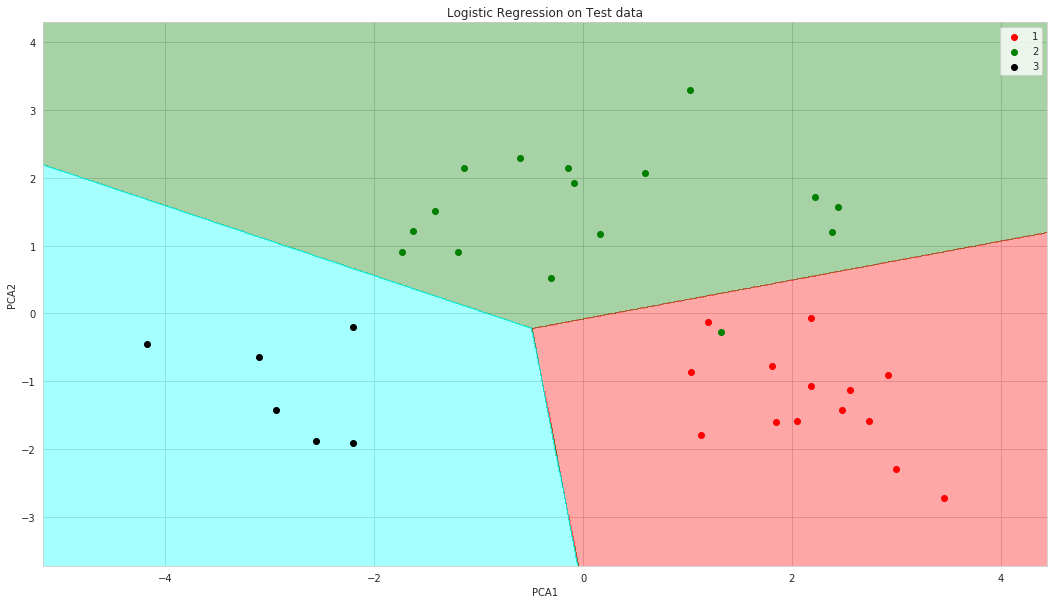

In [20]:
# Visualizing Logistic Regression On Test Data

sns.set_style('whitegrid')
plt.figure(figsize = (18,10))
from matplotlib.colors import ListedColormap

X_set , y_set = Xtest , ytest

#-------------------

X1 , X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1 , stop = X_set[:,0].max() + 1 , step = 0.01) ,
                      np.arange(start = X_set[:,1].min() - 1 , stop = X_set[:,1].max() + 1 , step = 0.01))

# meshgrid converts a 1D array into a matrix conining the rectangular coordinates for that points in the array
# and here we are taking arange two times because we have two parameters deciding the value

#-------------------
plt.contourf(X1 ,X2 , classifier.predict(np.array([X1.ravel() , X2.ravel()]).T).reshape(X1.shape) , alpha = 0.35,
            cmap = ListedColormap(('red' , 'green','cyan')))

# the classifier here predixts the values and plots them which appers to us as the coloured regions
# contour fill plot is used to plot contours and fill the regions having same value with some color
# ravel converts a n dim matrix into an 1D array

#------------------
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

#--------------------

for i , j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j , 0] , X_set[y_set == j , 1] , c = ListedColormap(('red','green','black'))(i) , label = j)

# enumerate returns the a set of labels and for each unique value in the array returned by unique()
# here in this case j will be 0 ,1 i.e the unique values and i will be 0,1 i.e the label assigned to this values

plt.title('Logistic Regression on Test data')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()

Done